In [51]:
import pandas as pd
from sklearn.datasets import load_iris
from base_data_handler import BaseDataHandler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the iris dataset
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add target column (species)
df['target'] = iris.target

# Optional: map target numbers to species names
df['species'] = df['target'].map(dict(enumerate(iris.target_names)))

df = df.drop(columns=['target'])

In [52]:
handler = BaseDataHandler(df=df)

In [53]:
handler.print_dataframe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


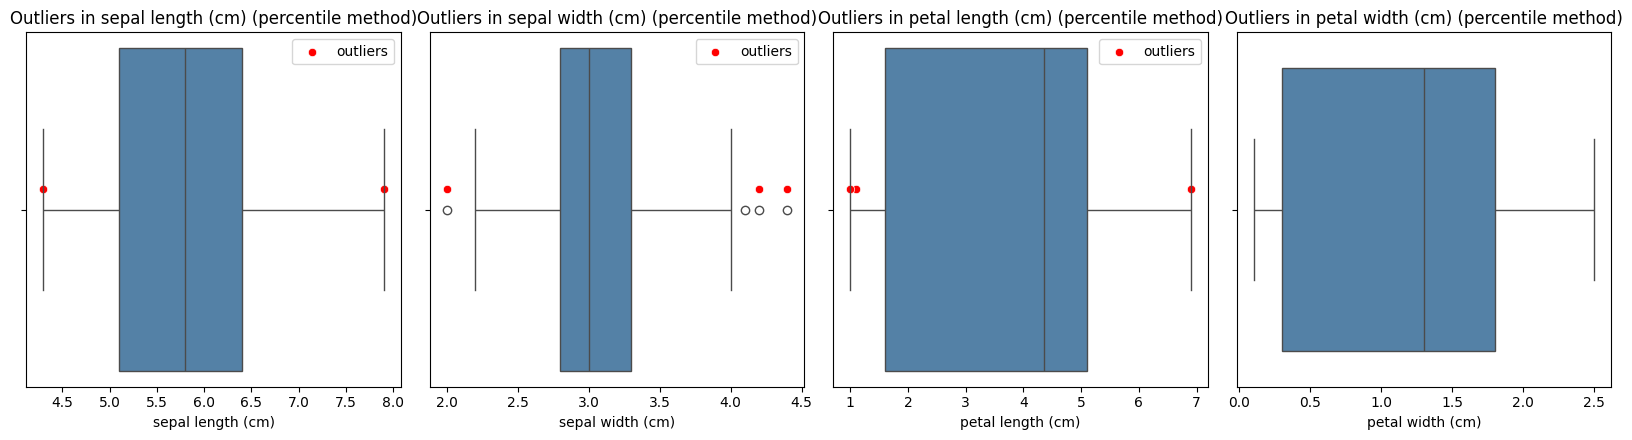

In [62]:
# Detect outliers with percentile method
outlier_flags = handler.detect_outliers_all(
    method="percentile", lower_percentile=0.01, upper_percentile=0.99
)

# Get numeric columns
numeric_cols = handler.df.select_dtypes(include="number").columns
n_cols = len(numeric_cols)

size_mul = .9
# Grid layout: 4 plots per row
n_rows = (n_cols + 2) // 4
fig, axes = plt.subplots(n_rows, 4, figsize=(18*size_mul, 5*n_rows*size_mul))  # larger grid
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # Full boxplot
    sns.boxplot(data=handler.df, x=col, color="steelblue", ax=axes[i])

    # Overlay outliers in red (only if they exist)
    new_mask = outlier_flags[col]
    if new_mask.any():   # only plot if at least one outlier
        sns.scatterplot(
            x=handler.df[col][new_mask],
            y=[-0.05] * new_mask.sum(),   # jitter so they appear just below the box
            color="red",
            marker="o",
            ax=axes[i],
            label="outliers"
        )
        axes[i].legend()   # add legend only if scatter was plotted

    axes[i].set_title(f"Outliers in {col} (percentile method)", fontsize=12)

# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

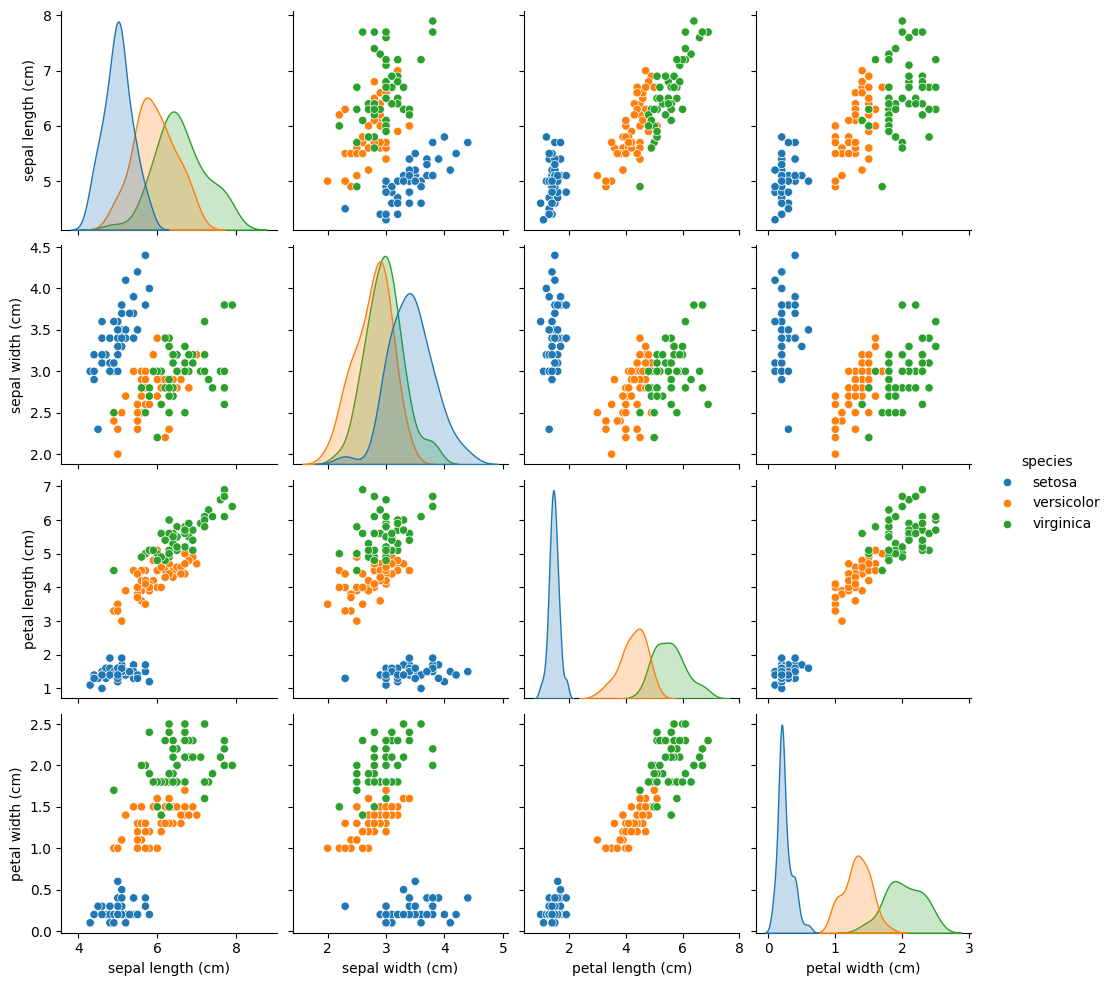

In [55]:
sns.pairplot(df, hue="species")
plt.show()

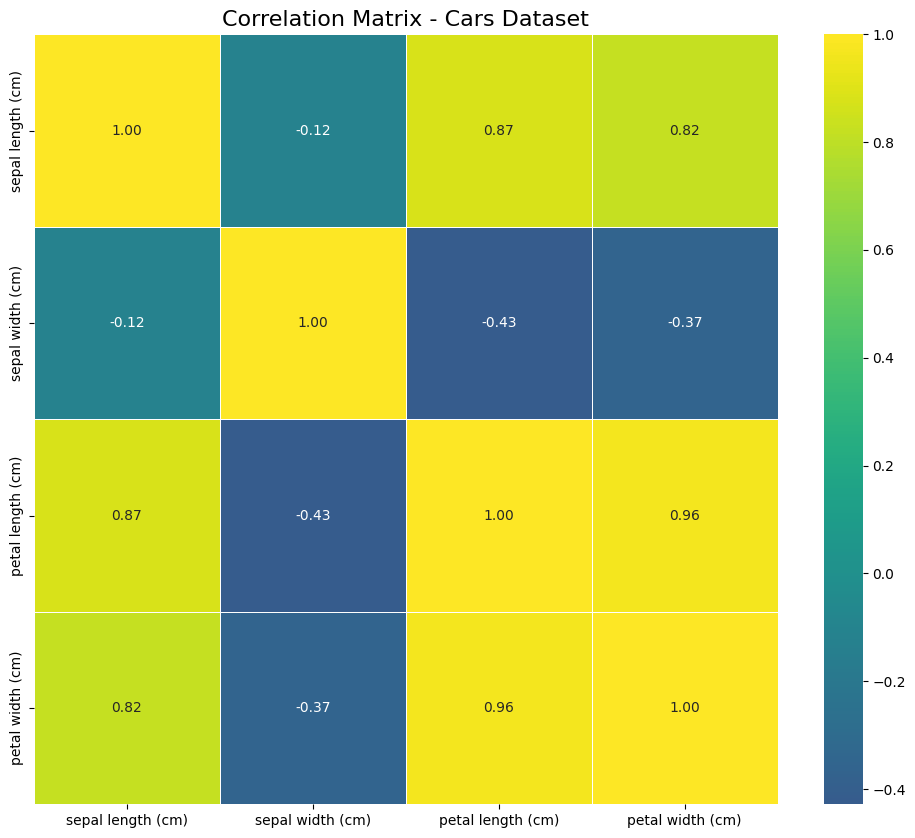

In [56]:
corr_matrix = handler.df[numeric_cols].corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='viridis', 
            center=0, 
            linewidths=0.5, 
            linecolor='white',
            fmt=".2f")

plt.title('Correlation Matrix - Cars Dataset', fontsize=16)
plt.show()

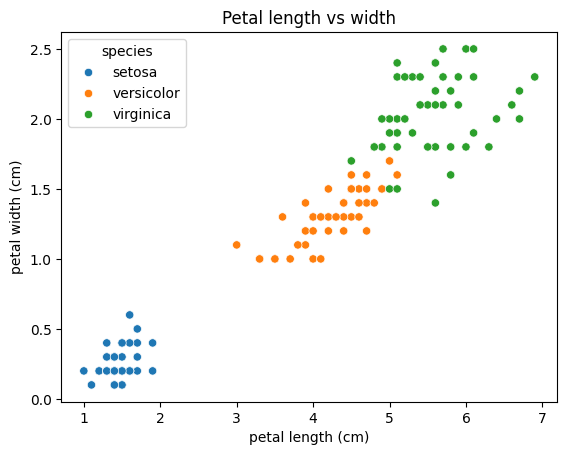

In [63]:
sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue="species")
plt.title("Petal length vs width")
plt.show()


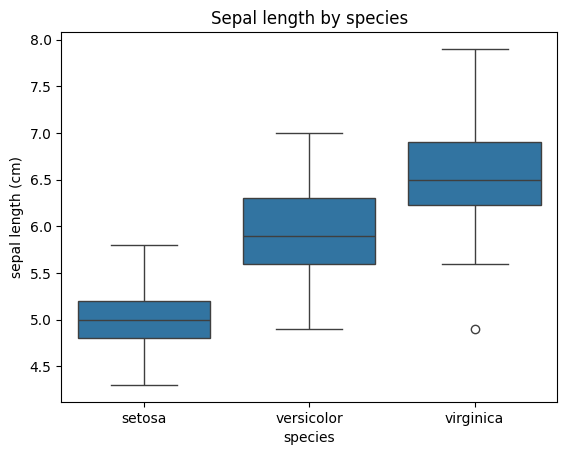

In [58]:
sns.boxplot(data=df, x="species", y="sepal length (cm)")
plt.title("Sepal length by species")
plt.show()
